# This project finds the smallest primitive for all prime numbers less than N


In [36]:
import math

#Define a few usefull functions

In [37]:
#Fast exponentiation modulo an integer using consecutive squaring
#compute a**x mod n
def pow_mod(a,x,n):
    result=1
    temp_a, temp_x = a, x#if we do not wish to modify a or x
    while temp_x>0:
        if temp_x%2!=0:
            result=(result*temp_a) % n
        temp_a=temp_a**2 % n   
        temp_x=temp_x//2
    return result

In [38]:
#Finding the Greatest Common Divisor
def gcd(a=1,b=1):
    if a==0:
        return b
    g=gcd(b%a,a)
    return g
    
    
#Extended Euclidean Algorithm: provides both the greatest common divisor and the inverse modulo the other number
def generalized_Euclidean(a=1,b=1):    
    if a == 0:
        return (b, 0, 1)
    else:
        (gcd, x, y) = generalized_Euclidean(b%a, a)
        return (gcd, (y - int(b / a)*x), x)

In [39]:
#Generate the prime numbers less than a given N using the Sieve of Eratosthenes
def primes_by_Eratosthenes(N=1000000):
    prime_list=[2,3]
    i=5
    while i<=N:
        if i%2!=0 and 2%3!=0:
            j=1
            flag=True
            sqrt_i=int(math.sqrt(i))
            while prime_list[j]<=sqrt_i and flag:
                if i% prime_list[j]==0:
                    flag=False
                    break
                j+=1
            if flag:
                prime_list.append(i)
        i+=1
    return prime_list
    
primes=primes_by_Eratosthenes()

In [40]:
#List the prime factors
def prime_factors(n):
    prime_factors=[]
    for prime in primes:
        if prime>n:
            break
        else:
            if n%prime==0:
                prime_factors.append(prime)
                while n% prime==0:
                    n=n/prime
    return prime_factors

In [41]:
#Generate the smallest primitive root modulo each prime number in the list of prime numbers
#returns a dictionary with keys in the set of primes and values the smallest primitive root
#We choose to store the values as a dictionary to be able to do a quick search in O(1) time
def smallest_primitive(primes):
    primitive_roots={}
    for prime in primes:
        g=1
        factors=prime_factors(prime-1)
        while g<=prime-1:
            flag=True
            for factor in factors:
                if pow_mod(g, (prime - 1) / factor, prime) == 1:
                    flag=False
                    break
            if flag:
                primitive_roots[prime]=g
                break
            g+=1
    return primitive_roots

In [42]:
roots=smallest_primitive(primes)


In [43]:
#If we want to transform the data of the roots into an array
#or save it into a table
import numpy as np
import pandas as pd

arr=np.array(list(roots.items()), dtype=np.int64)
df=pd.DataFrame(arr,index=None,columns=["Prime Number", "Smallest Primitive Root"])
df.to_csv("datasets/List_of_primitive_roots.csv", index=False)

In [44]:
#Opening the list of primitive roots from a csv file
df=pd.read_csv("datasets/List_of_primitive_roots.csv")
arr=df.to_numpy()
primes=df["Prime Number"].to_list()
roots=dict(zip(df["Prime Number"],df["Smallest Primitive Root"]))

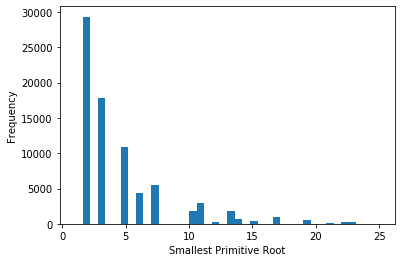

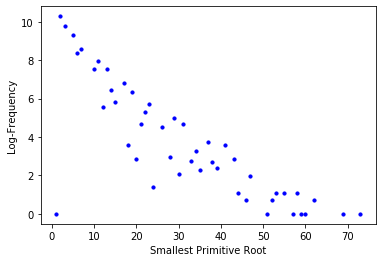

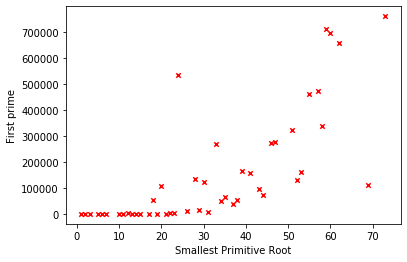

In [45]:
#Visualizing some properties of the smallest primitive root
import matplotlib.pyplot as plt

#The first prime, for which g is the smallest primitive root
first=df.groupby(["Smallest Primitive Root"]).min()
first.rename(columns={"Prime Number": "Smallest Prime Number"},
             inplace=True)
#The frequences of the smallest primitive root
frequences=df.groupby(["Smallest Primitive Root"]).count()
frequences.rename(columns={"Prime Number": "Frequency"},
                  inplace=True)

info=first.merge(frequences, on=["Smallest Primitive Root"])
X=info.reset_index(level=0).to_numpy()

#The frequences of the smallest primitive root
freq=plt.hist(df["Smallest Primitive Root"],bins=40, range=[1,25])
plt.xlabel("Smallest Primitive Root")
plt.ylabel("Frequency")
plt.show()

#Plot of the logarithm of the frequences of the smallest primitive root
plot1=plt.scatter(X[:,0],np.log(X[:,2]),s=40,marker=".",color='b')
plt.xlabel("Smallest Primitive Root")
plt.ylabel("Log-Frequency")
plt.show()

#Plot of the first prime, for which g is the smallest primitive root
plot2=plt.scatter(X[:,0],X[:,1],s=20,marker="x",color='r')
plt.xlabel("Smallest Primitive Root")
plt.ylabel("First prime")
plt.show()

In [47]:
#Compute the second primitive root
def second_primitive(roots):
    second_roots={}
    for prime,first_root in roots.items():
        if prime==2:
            continue
        else:
            g=first_root+1
            factors=prime_factors(prime-1)
            while g<=prime-1:
                flag=True
                for factor in factors:
                    if pow_mod(g, (prime - 1) / factor, prime) == 1:
                        flag=False
                        break
                if flag:
                    second_roots[prime]=g
                    break
                g+=1
    return second_roots


In [48]:
second_roots=second_primitive(roots)

In [50]:
#Saving the second primitive roots in a table
import numpy as np
import pandas as pd
arr2=np.array(list(second_roots.items()), dtype=np.int64)
df2=pd.DataFrame(arr2,index=None,columns=["Prime Number", "Second Smallest Primitive Root"])
df2.to_csv("datasets/List_of_second_primitive_roots.csv", index=False)

In [51]:
#Opening the list of second primitive roots from a csv file
df2=pd.read_csv("datasets/List_of_second_primitive_roots.csv")
arr2=df.to_numpy()
primes=df2["Prime Number"].to_list()
second_roots=dict(zip(df2["Prime Number"],df2["Second Smallest Primitive Root"]))

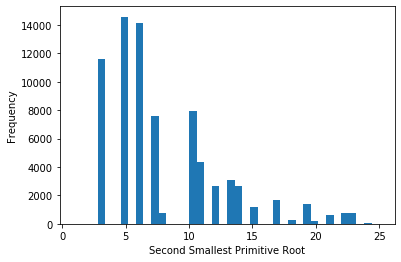

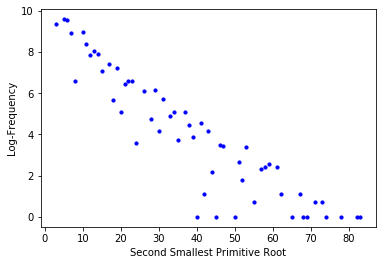

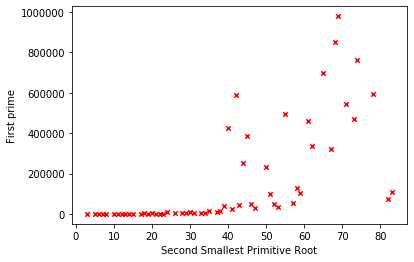

In [53]:


#The first prime, for which g is the second smallest primitive root
second=df2.groupby(["Second Smallest Primitive Root"]).min()
second.rename(columns={"Prime Number": "Smallest Prime Number"},
             inplace=True)
#The frequences of the second smallest primitive root
frequences=df2.groupby(["Second Smallest Primitive Root"]).count()
frequences.rename(columns={"Prime Number": "Frequency"},
                  inplace=True)

info=second.merge(frequences, on=["Second Smallest Primitive Root"])
X=info.reset_index(level=0).to_numpy()

#The frequences of the second smallest primitive root
freq=plt.hist(df2["Second Smallest Primitive Root"],bins=40, range=[1,25])
plt.xlabel("Second Smallest Primitive Root")
plt.ylabel("Frequency")
plt.show()

#Plot of the logarithm of the frequences of the second smallest primitive root
plot3=plt.scatter(X[:,0],np.log(X[:,2]),s=40,marker=".",color='b')
plt.xlabel("Second Smallest Primitive Root")
plt.ylabel("Log-Frequency")
plt.show()

#Plot of the first prime, for which g is the second smallest primitive root
plot4=plt.scatter(X[:,0],X[:,1],s=20,marker="x",color='r')
plt.xlabel("Second Smallest Primitive Root")
plt.ylabel("First prime")
plt.show()



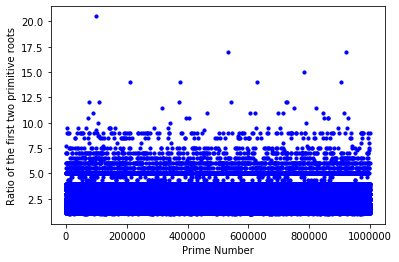

In [60]:
#Plot the relative difference of the first to second primitive root.
df3=df.merge(df2,how='inner',on=['Prime Number'])
df3["Ratio"]=df3['Second Smallest Primitive Root']/df3['Smallest Primitive Root']

plot5=plt.scatter(df3['Prime Number'],df3['Ratio'],s=40,marker=".",color='b')
plt.xlabel("Prime Number")
plt.ylabel("Ratio of the first two primitive roots")
plt.show()

Note that there are only 32 primes, for which the ratio is more than 10. The highest ratio (20.5) is obtained for the prime 97651. 